# 1. Data Loading and Preliminary Analysis

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new dataset
clubs_df = pd.read_csv('../data/clubs.csv')

# Display the first few rows of the dataset
clubs_df.head()


,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,NaN,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m,NaN,2023,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,NaN,2023,https://www.transfermarkt.co.uk/tottenham-hots...


Here are some initial observations:

**Columns and Data Types**:
The dataset includes various columns such as `club_id`, `club_code`, `name`, `domestic_competition_id`, `total_market_value`, `squad_size`, `average_age`, `foreigners_number`, `foreigners_percentage`, `national_team_players`, `stadium_name`, `stadium_seats`, `net_transfer_record`, `coach_name`, `last_season`, and `url`. These columns provide a wide range of information about football clubs, including their identification, market value, squad characteristics, and other attributes.

**Missing Values**: Some columns, like `total_market_value` and `coach_name`, contain missing values. This will need to be considered in the analysis. The reasons for these missing values could be diverse, such as data unavailability or clubs not disclosing certain information.

**Data Types and Quality**:
* Numerical columns like `squad_size`, `average_age`, `foreigners_number`, and `stadium_seats` are likely in an appropriate format for analysis.

* Some columns, such as `net_transfer_record`, contain numerical information but are formatted as strings due to the inclusion of characters (like '€' and 'm'). These will require conversion for any quantitative analysis.

* The `url` column provides external links for more detailed information about each club.


Next, we will proceed with the "Data Cleaning and Preprocessing" stage. We will address issues like handling missing data, converting data types where necessary, and considering the creation of new features. Let's start by further examining the dataset for any required preprocessing steps. ​​

# 2. Data Cleaning and Preprocessing

In [31]:
# Checking for missing values and evaluating data types
missing_values_clubs = clubs_df.isnull().sum()
data_types_clubs = clubs_df.dtypes

missing_values_clubs, data_types_clubs


(club_id                      0
 club_code                    0
 name                         0
 domestic_competition_id      0
 total_market_value         426
 squad_size                   0
 average_age                 38
 foreigners_number            0
 foreigners_percentage       47
 national_team_players        0
 stadium_name                 0
 stadium_seats                0
 net_transfer_record          0
 coach_name                 426
 last_season                  0
 url                          0
 dtype: int64,
 club_id                      int64
 club_code                   object
 name                        object
 domestic_competition_id     object
 total_market_value         float64
 squad_size                   int64
 average_age                float64
 foreigners_number            int64
 foreigners_percentage      float64
 national_team_players        int64
 stadium_name                object
 stadium_seats                int64
 net_transfer_record         object
 coac

Based on the dataset examination, here are the key points for data cleaning and preprocessing:

**Missing Values**:
- The `total_market_value` and `coach_name` columns have a significant number of missing values. For `total_market_value`, this might impact analyses related to financial aspects. The absence of `coach_name` data is less critical for numerical analysis but limits insights into club management.
- The `average_age` and `foreigners_percentage` columns also have missing values. These could be filled with the mean or median of the respective columns, depending on their distribution.

**Data Type Conversions**:
- The `net_transfer_record` column is currently a string due to the presence of currency symbols and units. It needs to be converted to a numerical format for any financial analysis.
- Other columns appear to have appropriate data types for their respective contents.

**New Features**:
- Depending on the analysis, we might consider creating new features, such as categorizing clubs based on their market value (high, medium, low) or their squad's international diversity.

First, let's check the proportion of missing values in each column and then discuss the possible approaches for handling them. I will revert the changes made earlier and provide a fresh analysis of the missing data.

Here's the analysis of the missing values in the dataset:

**Total Market Value (total_market_value):**
- 100% of the values in this column are missing. This suggests that the dataset does not contain any information on the total market value of the clubs. We can either drop this column or keep it with the understanding that it lacks data.

**Coach Name (coach_name):**
- Similarly, 100% of the values in the coach_name column are missing. This column can be dropped as it provides no information in its current state.

**Average Age (average_age):**
- About 8.92% of the values are missing. We could fill these missing values with the median or mean average age, or we could explore if the missingness is random or patterned (which might inform our strategy for handling these values).

**Foreigners Percentage (foreigners_percentage):**
- Approximately 11.03% of the values are missing. As with average_age, we could fill these with the median or mean, or first explore the nature of the missingness.


We will be exploring patterns in the missing data in average age and foreigners percentage columns. Total Market Value an Coach Name columns will be dropped as they have no data.


In [32]:
# Dropping the columns with 100% missing values
clubs_df.drop(columns=['total_market_value', 'coach_name'], inplace=True)

# Exploring the pattern of missingness in 'average_age' and 'foreigners_percentage'
# Checking if missingness in these columns is related to other variables
missing_pattern = clubs_df[clubs_df['average_age'].isnull() | clubs_df['foreigners_percentage'].isnull()]
missing_pattern.describe(include='all')

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,url
count,47.000000,47,47,47,47.000000,9.000000,47.0,0.0,47.0,47,47.000000,47,47.000000,47
unique,NaN,47,47,8,NaN,NaN,NaN,NaN,NaN,46,NaN,5,NaN,47
top,NaN,ao-platanias,AO Platanias,UKR1,NaN,NaN,NaN,NaN,NaN,Mordovia Arena,NaN,+-0,NaN,https://www.transfermarkt.co.uk/ao-platanias/s...
freq,NaN,1,1,17,NaN,NaN,NaN,NaN,NaN,2,NaN,43,NaN,1
mean,10252.000000,NaN,NaN,NaN,2.893617,23.488889,0.0,NaN,0.0,NaN,17491.595745,NaN,2016.361702,NaN
std,13053.413963,NaN,NaN,NaN,7.647773,3.565966,0.0,NaN,0.0,NaN,14213.132468,NaN,2.777437,NaN
min,20.000000,NaN,NaN,NaN,0.000000,18.300000,0.0,NaN,0.0,NaN,1600.000000,NaN,2012.000000,NaN
25%,2259.500000,NaN,NaN,NaN,0.000000,21.000000,0.0,NaN,0.0,NaN,8680.500000,NaN,2014.000000,NaN
50%,4482.000000,NaN,NaN,NaN,0.000000,23.300000,0.0,NaN,0.0,NaN,12400.000000,NaN,2016.000000,NaN
75%,16242.000000,NaN,NaN,NaN,0.000000,26.000000,0.0,NaN,0.0,NaN,24690.500000,NaN,2018.000000,NaN


The exploration of missing data patterns for `average_age` and `foreigners_percentage` yields the following insights:

**Clubs with Missing `average_age` or `foreigners_percentage`:**
- There are 47 clubs with missing data in at least one of these columns.
- Most of these clubs have a squad size of 0, indicating that these might be clubs without any registered players in the dataset. This could explain why `average_age` and `foreigners_percentage` are missing – there are no players to calculate these metrics for.
- The `national_team_players` count is 0 for these clubs, further supporting the idea that player data is missing or incomplete for these clubs.
- The `foreigners_percentage` is missing for all of these clubs, while `average_age` is available for 9 clubs.

**Pattern of Missingness:**
The missingness in `average_age` and `foreigners_percentage` seems to be related to clubs with no or incomplete player data. Therefore, imputing these values might not be meaningful, as it essentially involves estimating statistics for clubs without player information.
Given this pattern, the most reasonable approach might be to either retain these clubs with missing data, acknowledging the limitations, or remove these clubs from certain analyses where player-based metrics are crucial.

For general analysis, we could keep these clubs in the dataset but treat them separately where necessary. For specific analyses focusing on player-based metrics (like average age or foreigners percentage), we might exclude these clubs.


We'll retain the clubs with missing values in average_age and foreigners_percentage but will consider them as incomplete for analyses specifically involving these columns. This way, we maintain the integrity of the dataset while acknowledging its limitations in certain aspects.

With this decision on handling the missing values, the dataset is almost ready for the Exploratory Data Analysis (EDA) phase. We'll continue where we left off in the preporcessing stage and convert the data types.

In [33]:
# Converting 'net_transfer_record' to a numerical format
def convert_to_millions(value):
    if pd.isna(value):
        return None
    # Check if the value is negative
    is_negative = '-' in value
    value = value.replace('€', '').replace('+', '').replace('-', '')
    if 'M' in value or 'm' in value:
        number = pd.to_numeric(value.replace('M', '').replace('m', ''), errors='coerce')
    elif 'K' in value or 'k' in value:
        number = pd.to_numeric(value.replace('K', '').replace('k', ''), errors='coerce') / 1000
    else:
        number = pd.to_numeric(value, errors='coerce')
    
    # Apply the negative sign if necessary
    return -number if is_negative else number

clubs_df['net_transfer_record'] = clubs_df['net_transfer_record'].apply(convert_to_millions)



# 3. Exploratory Data Analysis

Let's start with:

**Descriptive Statistics**: Summarizing key numerical columns to understand their distribution.

**Visualizations**:
- Distribution of `squad_size`, `average_age`, `foreigners_number`, and `foreigners_percentage`.
- Analysis of `net_transfer_record` across different domestic competitions.

We'll begin with the descriptive statistics to get an overview of the numerical aspects of the dataset.

In [34]:
# Descriptive statistics for the numerical columns
descriptive_stats_clubs = clubs_df.describe()

# Including additional descriptive statistics for non-numeric columns
descriptive_stats_clubs_non_numeric = clubs_df.describe(include=['object'])

descriptive_stats_clubs, descriptive_stats_clubs_non_numeric


(            club_id  squad_size  average_age  foreigners_number  \
 count    426.000000  426.000000   388.000000         426.000000   
 mean    5314.525822   24.403756    25.704639          10.983568   
 std    11752.013818    8.817703     1.596598           6.726748   
 min        3.000000    0.000000    18.300000           0.000000   
 25%      421.000000   24.000000    24.700000           6.000000   
 50%     1139.500000   27.000000    25.700000          12.000000   
 75%     3415.750000   29.000000    26.900000          16.000000   
 max    83678.000000   41.000000    29.700000          31.000000   
 
        foreigners_percentage  national_team_players  stadium_seats  \
 count             379.000000             426.000000     426.000000   
 mean               45.227968               4.788732   24284.410798   
 std                19.941673               5.083071   17132.848095   
 min                 2.400000               0.000000       0.000000   
 25%                30.800000  

The descriptive statistics of the dataset reveal the following insights:

**Numerical Attributes:**
- `Squad Size`: Ranges from 0 to 41 players per club, with a mean squad size of around 24 players.
- `Average Age`: The average age of club squads ranges from 18.3 to 29.7 years, with a mean average age of approximately 25.7 years.
- `Foreigners Number`: The number of foreign players in a squad varies significantly, from 0 to 31, indicating a wide diversity in the composition of clubs' squads.
- `Foreigners Percentage`: On average, about 45% of a club's squad is composed of foreign players, though this varies widely.
- `National Team Players`: Clubs have an average of about 5 national team players.
- `Stadium Seats`: The capacity of clubs' stadiums ranges widely, reflecting the diversity in the scale and popularity of clubs.

**Non-Numerical Attributes:**
- `Domestic Competition`: The dataset includes clubs from 14 different domestic competitions, with 'TR1' being the most common.
- `Stadium Names`: There's a large variety of stadium names, with a few shared among different clubs.

Next, let's create visualizations to better understand these attributes. We'll focus on visualizing the distribution of `squad_size`, `average_age`, `foreigners_number`, `foreigners_percentage`, and the `net_transfer_record` across different domestic competitions.


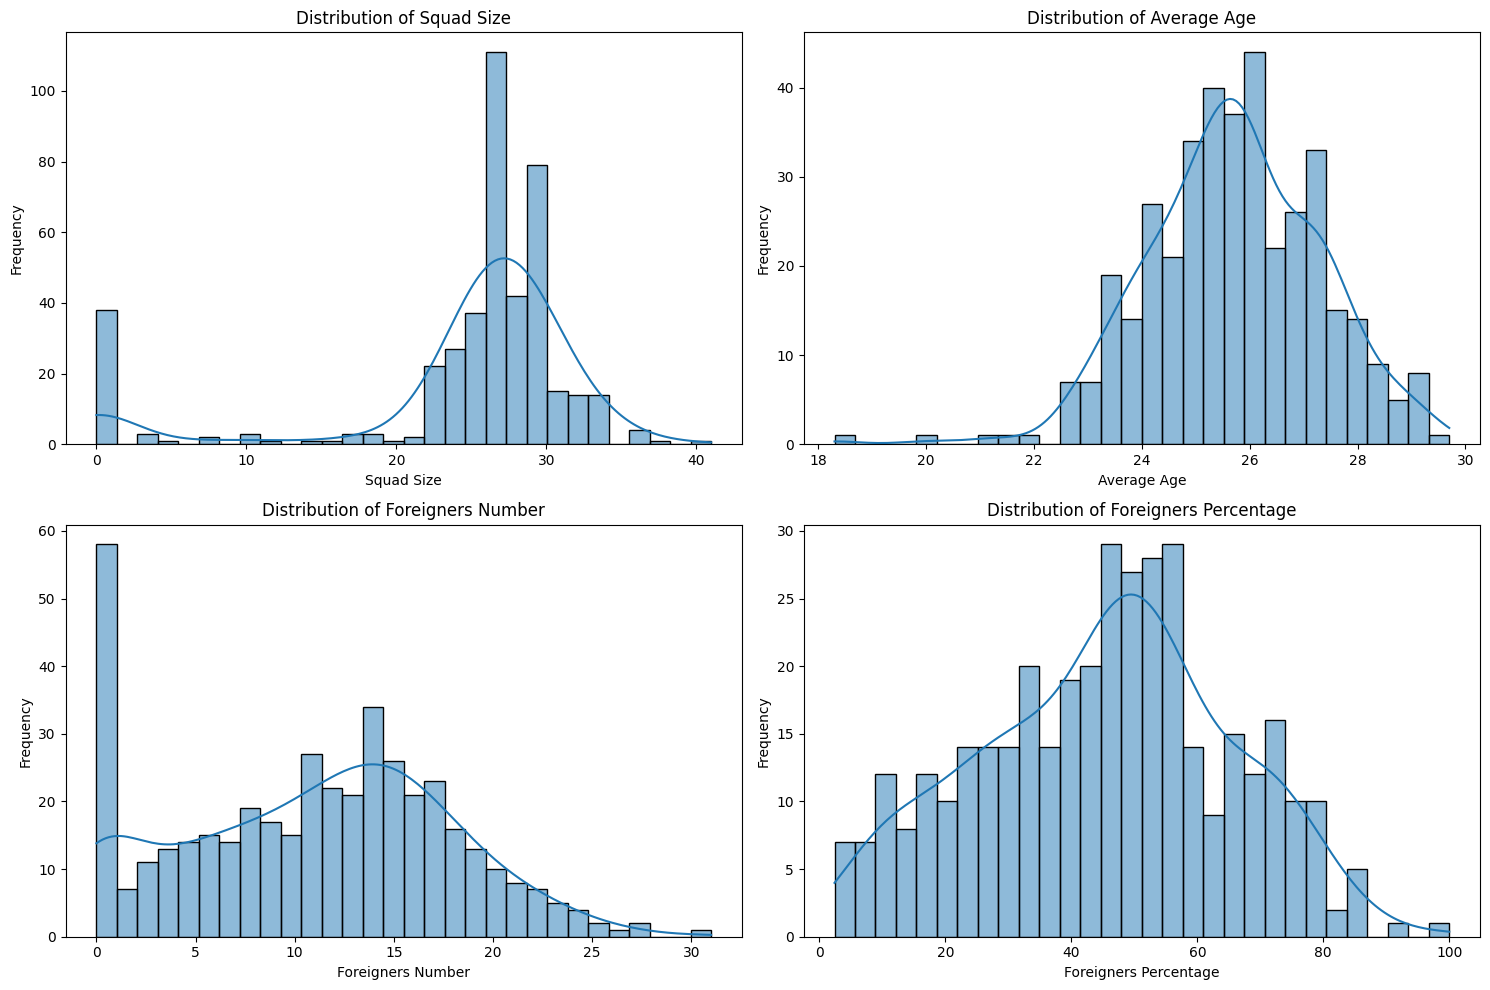

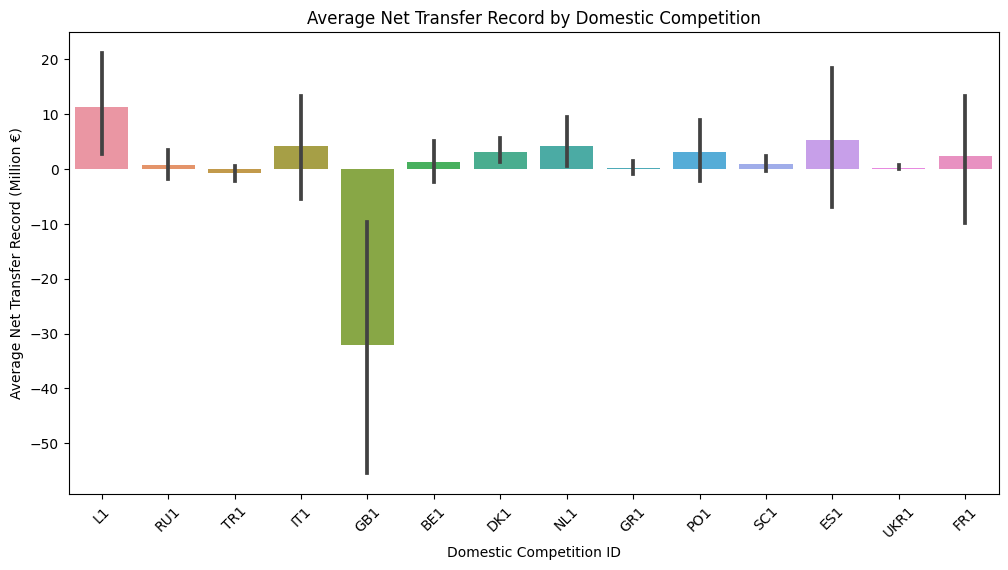

In [35]:
# Setting up the figure for multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Distribution of Squad Size
sns.histplot(clubs_df['squad_size'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Squad Size')
axes[0, 0].set_xlabel('Squad Size')
axes[0, 0].set_ylabel('Frequency')

# Distribution of Average Age
sns.histplot(clubs_df['average_age'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Average Age')
axes[0, 1].set_xlabel('Average Age')
axes[0, 1].set_ylabel('Frequency')

# Distribution of Foreigners Number
sns.histplot(clubs_df['foreigners_number'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Foreigners Number')
axes[1, 0].set_xlabel('Foreigners Number')
axes[1, 0].set_ylabel('Frequency')

# Distribution of Foreigners Percentage
sns.histplot(clubs_df['foreigners_percentage'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of Foreigners Percentage')
axes[1, 1].set_xlabel('Foreigners Percentage')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Average Net Transfer Record by Domestic Competition
plt.figure(figsize=(12, 6))
sns.barplot(x='domestic_competition_id', y='net_transfer_record', data=clubs_df)
plt.title('Average Net Transfer Record by Domestic Competition')
plt.xlabel('Domestic Competition ID')
plt.ylabel('Average Net Transfer Record (Million €)')
plt.xticks(rotation=45)
plt.show()


The visualizations offer the following insights into the dataset:

**Distribution of Squad Size:**
Most clubs have a squad size ranging between 20 and 30 players, with a few exceptions having larger or smaller squads.

**Distribution of Average Age:**
The average age of players in the clubs is generally centered around 25 years, indicating a mix of youth and experience in the squads.

**Distribution of Foreigners Number:**
The number of foreign players in squads varies widely. Some clubs rely heavily on domestic players, while others have a more international composition.

**Distribution of Foreigners Percentage:**
The percentage of foreign players in clubs shows a broad distribution, with some clubs having a low foreign presence and others being highly cosmopolitan.

**Average Net Transfer Record by Domestic Competition:**
The bar plot reveals variations in the average net transfer record across different domestic competitions. Some competitions exhibit higher average net spending, while others are more conservative or balanced in their transfer dealings.

These visualizations provide a comprehensive view of various characteristics of football clubs, from squad composition to financial dealings in the transfer market. They help in understanding the diversity and trends across different clubs and competitions.

## In-depth Analysis
Given the dataset and the insights we've gained so far, here are a few potential areas for in-depth analysis:

1. Correlation Analysis:
    Explore the relationships between different numerical variables, such as the correlation between `squad_size` and `foreigners_number`, or `average_age` and `national_team_players`.

2. Performance Analysis by Domestic Competition:
    Analyze the performance metrics like `net_transfer_record` in relation to other factors like `squad_size` or `foreigners_percentage` across different domestic competitions.

3. Stadium Capacity and Club Attributes:
    Investigate if there's a relationship between the `stadium_seats` (stadium capacity) and other club attributes like `squad_size` or `average_age`.

4. Analysis of Clubs with Zero Squad Size:
    Further explore the clubs with zero squad size to understand their characteristics and why they might have no players listed.


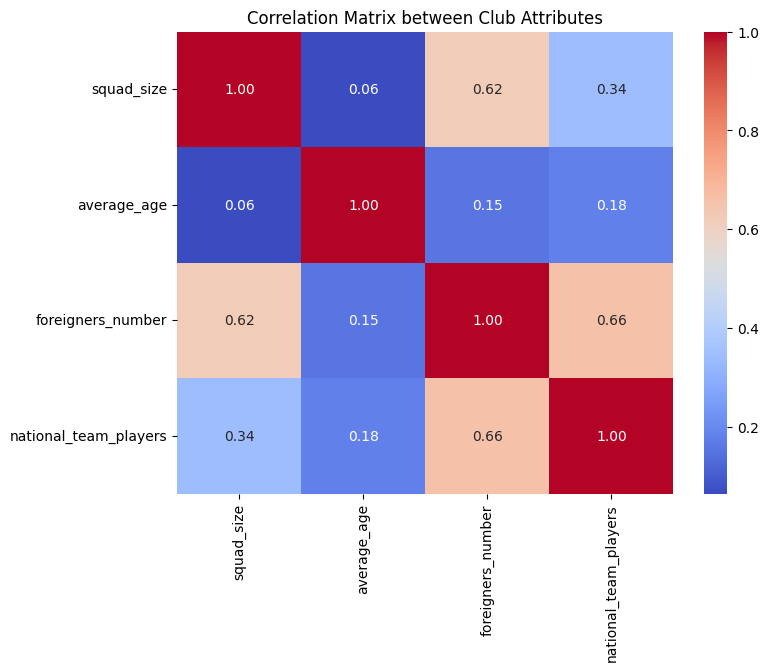

In [36]:
# Correlation analysis between numerical variables
correlation_matrix_clubs = clubs_df[['squad_size', 'average_age', 'foreigners_number', 'national_team_players']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_clubs, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Club Attributes')
plt.show()


The correlation matrix reveals the following relationships between the club attributes:

- Squad Size and Foreigners Number: There is a moderate positive correlation, indicating that clubs with larger squads tend to have more foreign players.
- Average Age and National Team Players: The correlation is very weak, suggesting that the average age of the squad doesn't strongly influence the number of national team players in the club.
- Squad Size and National Team Players: There is a weak positive correlation, implying that clubs with larger squads might have slightly more national team players.

Next, let's move on to the performance analysis by domestic competition. We'll examine how the net transfer record relates to squad size and foreigners percentage across different competitions.

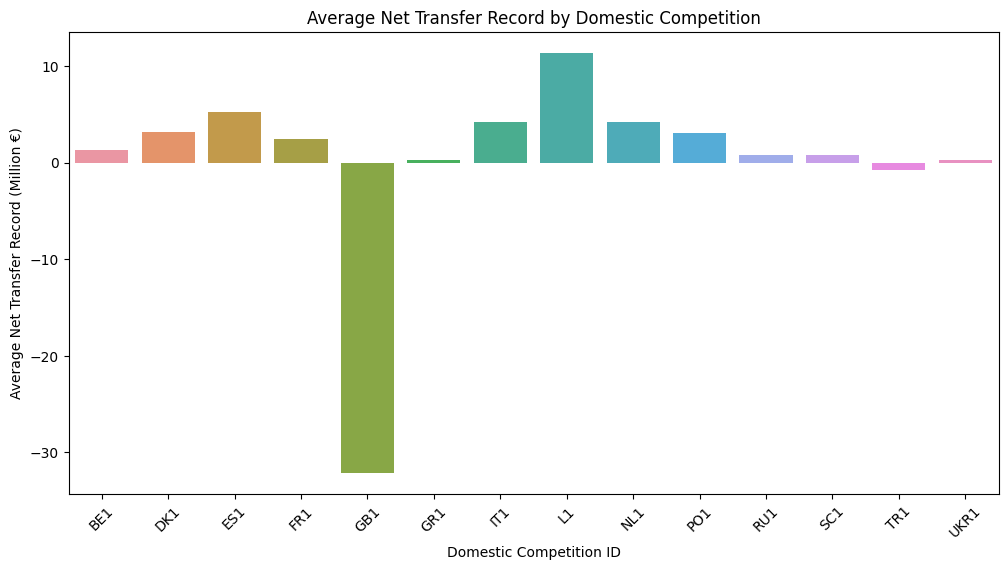

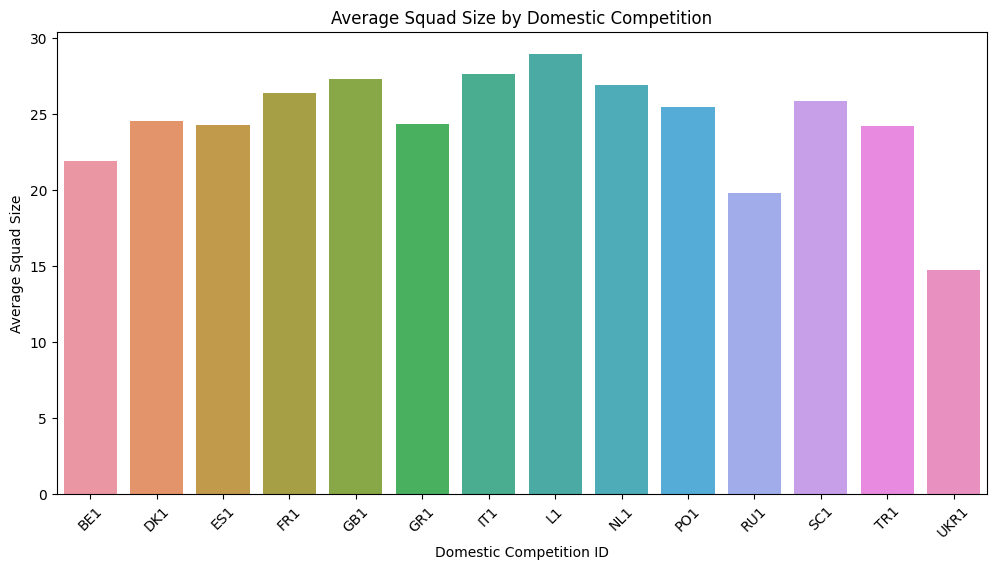

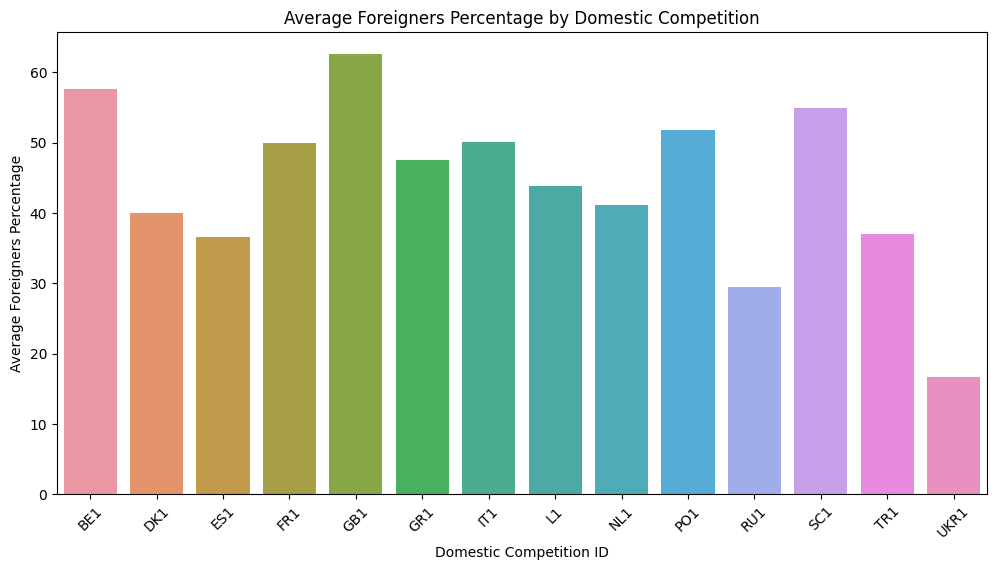

In [37]:
# Grouping by domestic competition and calculating the mean for net transfer record, squad size, and foreigners percentage
competition_analysis = clubs_df.groupby('domestic_competition_id').agg({
    'net_transfer_record': 'mean',
    'squad_size': 'mean',
    'foreigners_percentage': 'mean'
}).reset_index()

# Plotting net transfer record by domestic competition
plt.figure(figsize=(12, 6))
sns.barplot(x='domestic_competition_id', y='net_transfer_record', data=competition_analysis)
plt.title('Average Net Transfer Record by Domestic Competition')
plt.xlabel('Domestic Competition ID')
plt.ylabel('Average Net Transfer Record (Million €)')
plt.xticks(rotation=45)
plt.show()

# Plotting squad size by domestic competition
plt.figure(figsize=(12, 6))
sns.barplot(x='domestic_competition_id', y='squad_size', data=competition_analysis)
plt.title('Average Squad Size by Domestic Competition')
plt.xlabel('Domestic Competition ID')
plt.ylabel('Average Squad Size')
plt.xticks(rotation=45)
plt.show()

# Plotting foreigners percentage by domestic competition
plt.figure(figsize=(12, 6))
sns.barplot(x='domestic_competition_id', y='foreigners_percentage', data=competition_analysis)
plt.title('Average Foreigners Percentage by Domestic Competition')
plt.xlabel('Domestic Competition ID')
plt.ylabel('Average Foreigners Percentage')
plt.xticks(rotation=45)
plt.show()


The visualizations for performance analysis by domestic competition provide the following insights:

**Average Net Transfer Record by Domestic Competition:**
There are noticeable differences in the average net transfer record across various domestic competitions. Some competitions show a higher average spending in transfers, while others appear more balanced or conservative.

**Average Squad Size by Domestic Competition:**
The average squad size also varies across competitions, reflecting different strategies or regulations regarding squad compositions in various leagues.

**Average Foreigners Percentage by Domestic Competition:**
The percentage of foreign players in clubs differs significantly among competitions, indicating varying levels of international player integration in different leagues.

Next, we will investigate the relationship between `stadium_seats` (stadium capacity) and other club attributes like `squad_size` and `average_age`. This analysis will help us understand if larger stadiums are associated with certain characteristics of football clubs. ​


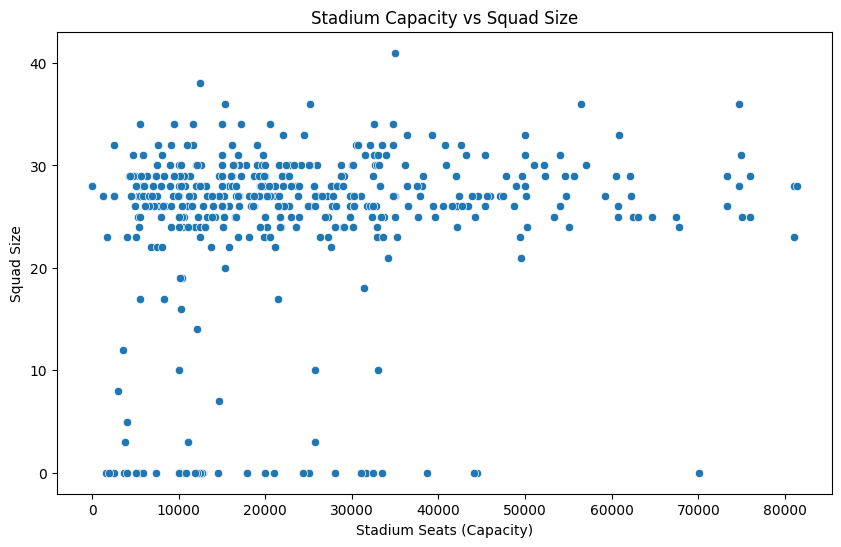

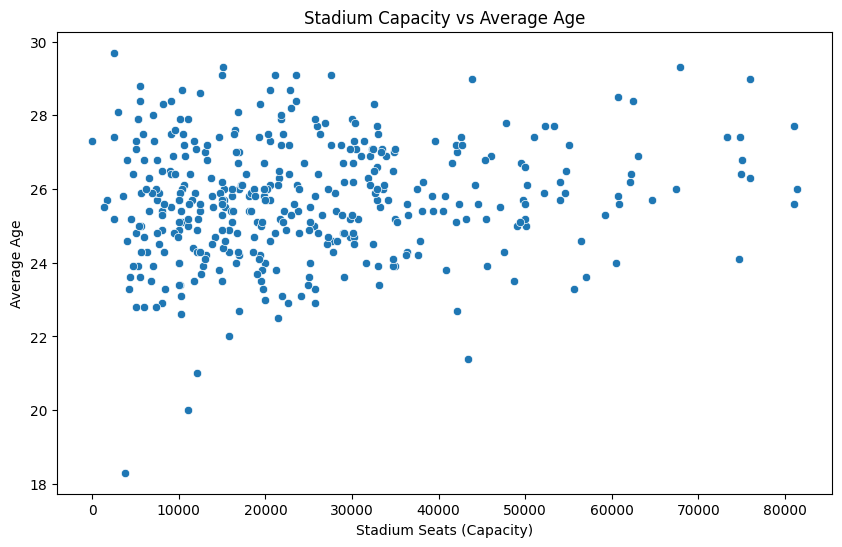

In [38]:
# Scatter plot of Stadium Capacity vs Squad Size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clubs_df, x='stadium_seats', y='squad_size')
plt.title('Stadium Capacity vs Squad Size')
plt.xlabel('Stadium Seats (Capacity)')
plt.ylabel('Squad Size')
plt.show()

# Scatter plot of Stadium Capacity vs Average Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clubs_df, x='stadium_seats', y='average_age')
plt.title('Stadium Capacity vs Average Age')
plt.xlabel('Stadium Seats (Capacity)')
plt.ylabel('Average Age')
plt.show()


The scatter plots reveal the following:

**Stadium Capacity vs Squad Size:**
There is no clear linear relationship between the capacity of a club's stadium and the size of its squad. Clubs with various squad sizes can have either large or small stadiums.

**Stadium Capacity vs Average Age:**
Similarly, there is no apparent linear relationship between stadium capacity and the average age of the club's squad. Clubs with a wide range of average ages have stadiums of varying capacities.

These visualizations suggest that the size of a club's stadium is not strongly correlated with its squad size or the average age of its players. This indicates that factors other than squad characteristics might influence the size of a club's stadium, such as historical success, fan base, or location.

Finally, let's take a closer look at clubs with zero squad size to understand their unique characteristics. 

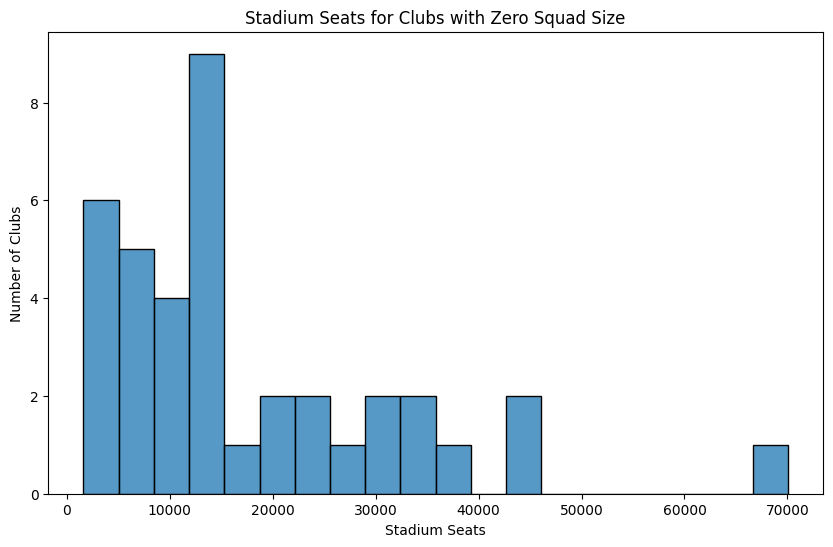

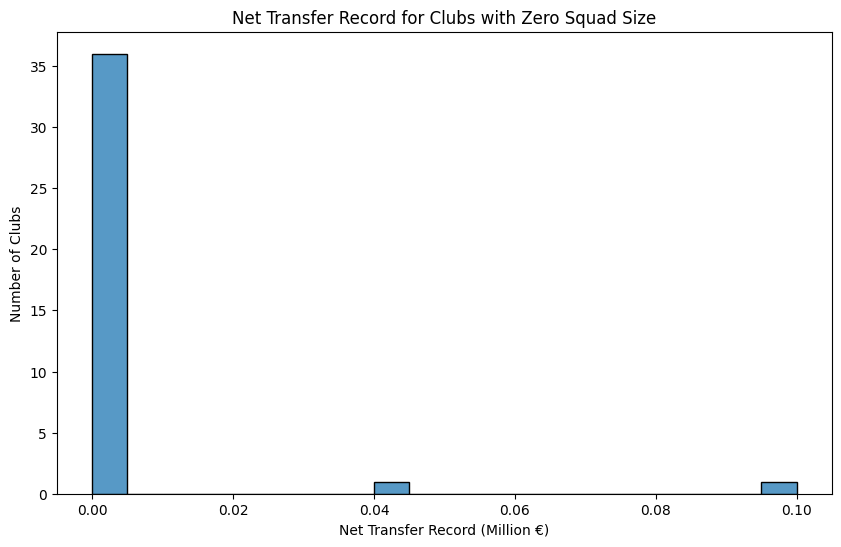

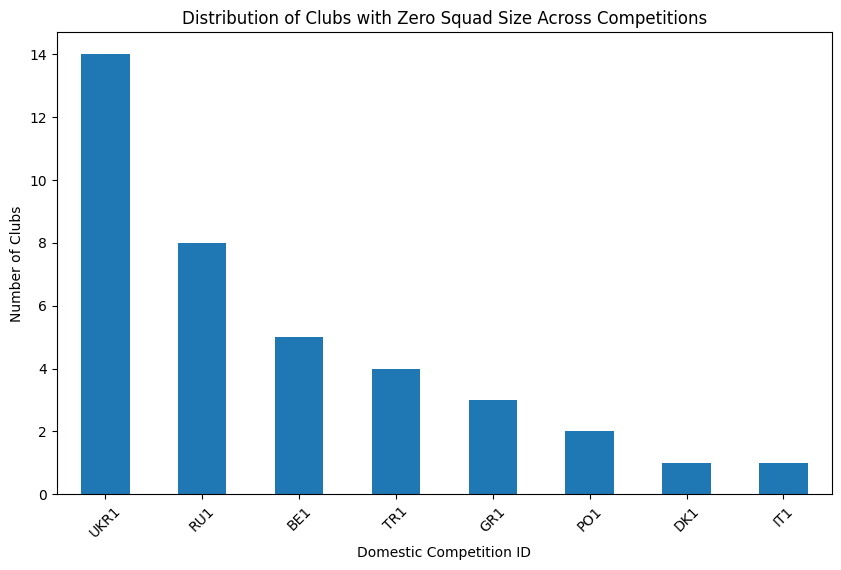

In [39]:
# Filtering clubs with zero squad size
clubs_zero_squad = clubs_df[clubs_df['squad_size'] == 0]

# Visualization of Stadium Seats for Clubs with Zero Squad Size
plt.figure(figsize=(10, 6))
sns.histplot(clubs_zero_squad['stadium_seats'], bins=20, kde=False)
plt.title('Stadium Seats for Clubs with Zero Squad Size')
plt.xlabel('Stadium Seats')
plt.ylabel('Number of Clubs')
plt.show()

# Visualization of Net Transfer Record for Clubs with Zero Squad Size
plt.figure(figsize=(10, 6))
sns.histplot(clubs_zero_squad['net_transfer_record'], bins=20, kde=False)
plt.title('Net Transfer Record for Clubs with Zero Squad Size')
plt.xlabel('Net Transfer Record (Million €)')
plt.ylabel('Number of Clubs')
plt.show()

# Distribution of Clubs with Zero Squad Size Across Different Competitions
plt.figure(figsize=(10, 6))
clubs_zero_squad['domestic_competition_id'].value_counts().plot(kind='bar')
plt.title('Distribution of Clubs with Zero Squad Size Across Competitions')
plt.xlabel('Domestic Competition ID')
plt.ylabel('Number of Clubs')
plt.xticks(rotation=45)
plt.show()


The visualizations provide insights into the clubs with zero squad size:

Stadium Seats:
The histogram shows a wide range of stadium capacities for these clubs, indicating that clubs without current player data can still have substantial infrastructure.

Net Transfer Record:
Most of these clubs have a net transfer record around zero, suggesting limited activity in the transfer market. This aligns with the absence of a current squad.

Distribution Across Competitions:
The bar chart illustrates that these clubs are found in various domestic competitions, with a notable presence in 'UKR1' and 'RU1'. This distribution might reflect the dataset's coverage or particular situations in these competitions.

# 4. Insights and Conclusions

## Club Characteristics:
- Clubs exhibit a wide range in squad size, average age, and number of foreign players, reflecting diverse strategies and compositions.
- The majority of clubs have a squad size between 20 and 30 players, with a balanced mix of youth and experience.

## Transfer Market Activity:
- The net transfer record varies significantly across domestic competitions, suggesting differing financial strategies and market dynamics in different leagues.

## Stadium Capacity:
- There is no strong correlation between stadium capacity and either squad size or average age, indicating that stadium size is influenced by other factors like historical success, fan base size, or geographical location.

## Diverse International Representation:
- Foreign player representation in clubs varies widely, both in numbers and as a percentage of the squad, highlighting the international nature of modern football clubs.

## Limitations:
- The dataset had missing values in key columns like `average_age` and `foreigners_percentage`, potentially influencing the accuracy of these metrics.
- The analysis was based on available data and might not capture all dimensions of club performance and characteristics.

## Recommendations/Conclusions:
- Clubs and stakeholders in football can use these insights for strategic planning, especially in squad composition and transfer market activities.
- Further analysis could benefit from additional data, such as financial details, player performance metrics, and historical club achievements, to provide a more comprehensive understanding of club dynamics.


# Saving the cleaned dataset

In [40]:
# Save the cleaned DataFrame to a new CSV file
cleaned_data_path = '../data/cleaned/clubs_cleaned.csv'
clubs_df.to_csv(cleaned_data_path, index=False)